In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
path = "C:\\Users\\lenovo\\Desktop\\Demand_Analysis_Model\\infrastructure\\Daily Demand Forecasting Orders.csv"  # عدّل المسار إذا لزم
df = pd.read_csv(path)

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Shape: (60, 13)

First 5 rows:
   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       

In [19]:
print("\nDtypes:")
print(df.dtypes)

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)



Dtypes:
Week of the month (first week, second, third, fourth or fifth week      int64
Day of the week (Monday to Friday)                                      int64
Non-urgent order                                                      float64
Urgent order                                                          float64
Order type A                                                          float64
Order type B                                                          float64
Order type C                                                          float64
Fiscal sector orders                                                  float64
Orders from the traffic controller sector                               int64
Banking orders (1)                                                      int64
Banking orders (2)                                                      int64
Banking orders (3)                                                      int64
Target (Total orders)                                  

In [20]:
print("\nDescribe numerical:")
print(df[numerical_cols].describe())

print("\nMissing values per column:")
print(df.isnull().sum())



Describe numerical:
       Week of the month (first week, second, third, fourth or fifth week  \
count                                          60.000000                    
mean                                            3.016667                    
std                                             1.282102                    
min                                             1.000000                    
25%                                             2.000000                    
50%                                             3.000000                    
75%                                             4.000000                    
max                                             5.000000                    

       Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
count                           60.000000         60.000000     60.000000   
mean                             4.033333        172.554933    118.920850   
std                              1.401775         69.5


Skewness of all columns:
Week of the month (first week, second, third, fourth or fifth week    0.017892
Day of the week (Monday to Friday)                                   -0.022888
Non-urgent order                                                      1.546244
Urgent order                                                          1.300066
Order type A                                                          1.724497
Order type B                                                          1.339496
Order type C                                                          1.728385
Fiscal sector orders                                                  3.146895
Orders from the traffic controller sector                             0.039353
Banking orders (1)                                                    2.043421
Banking orders (2)                                                    0.948538
Banking orders (3)                                                    1.418733
Target (Total orders)     

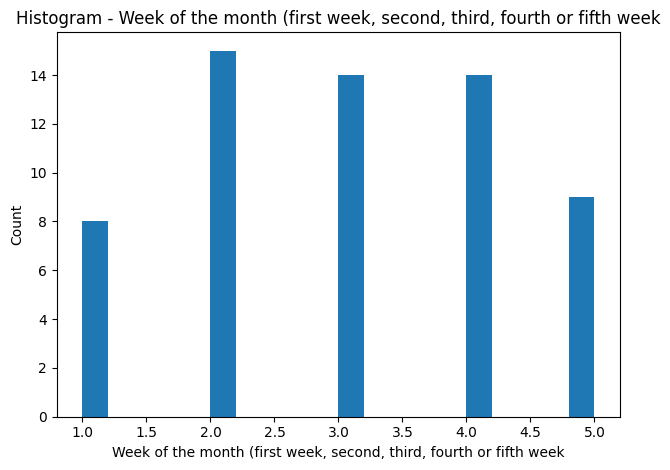

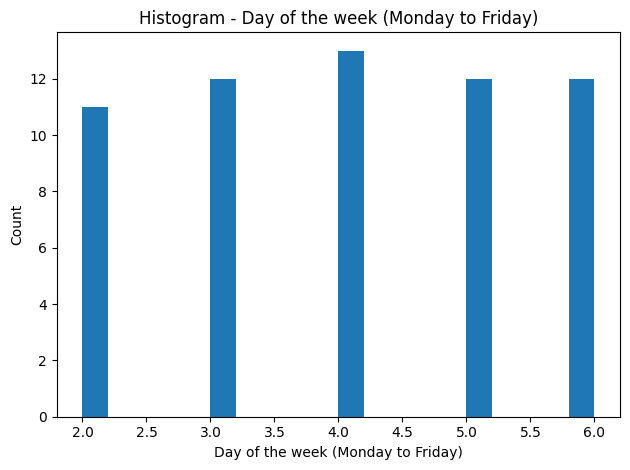

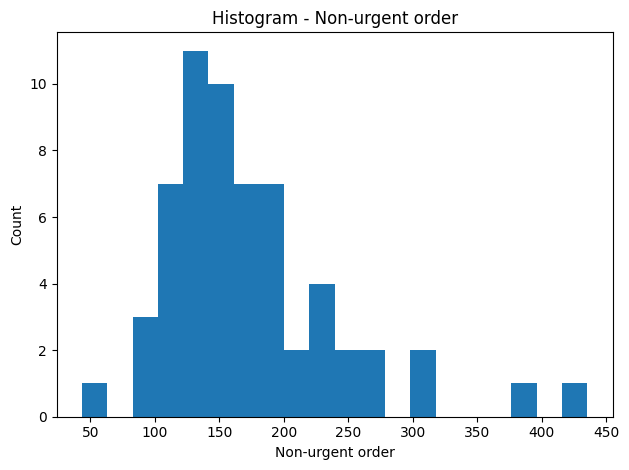

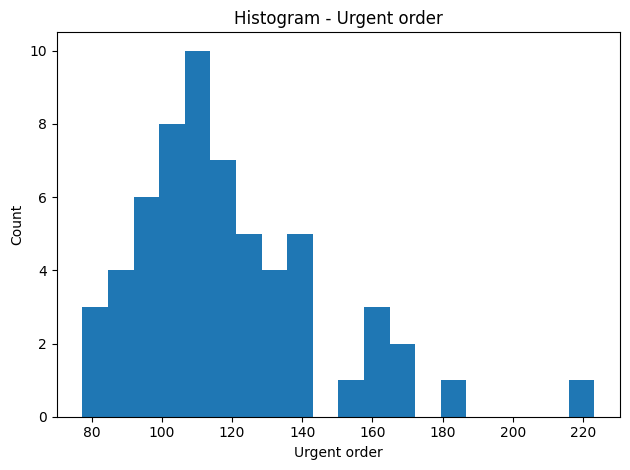

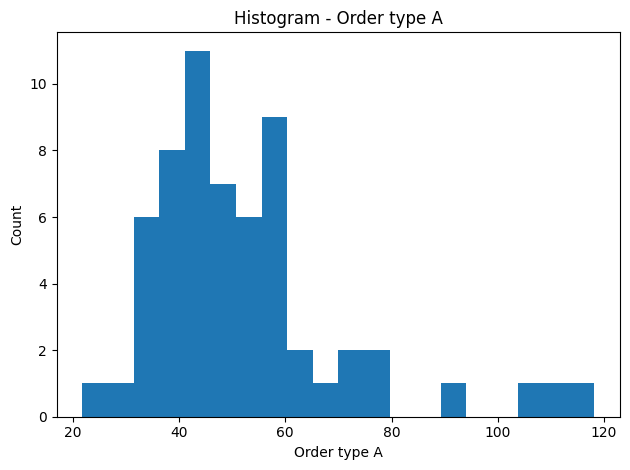

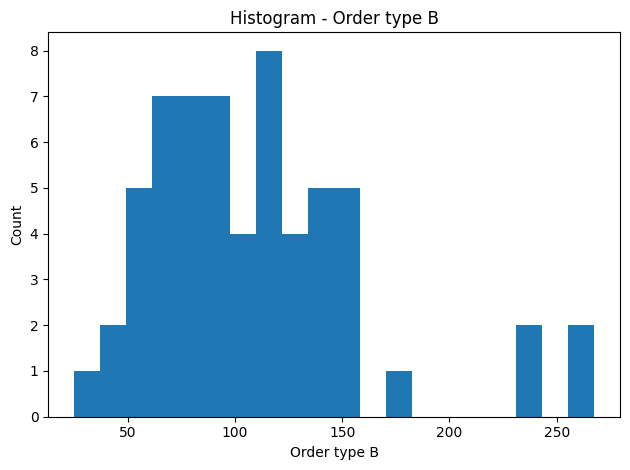

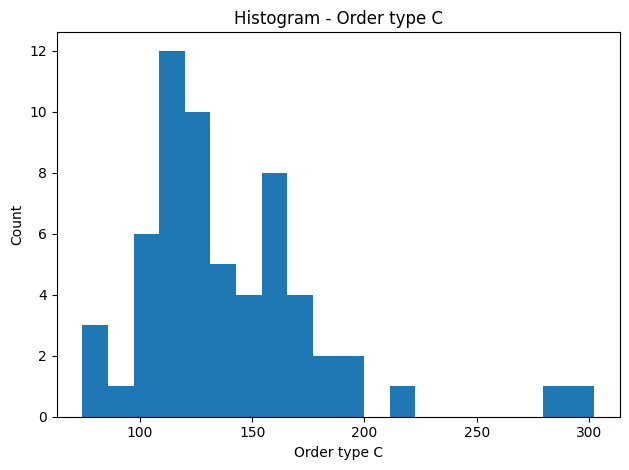

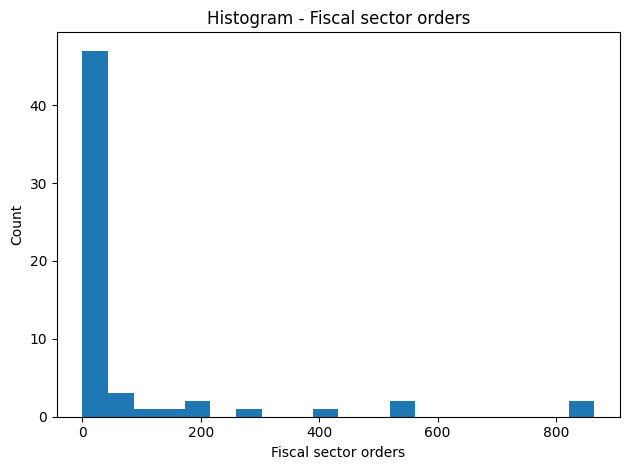

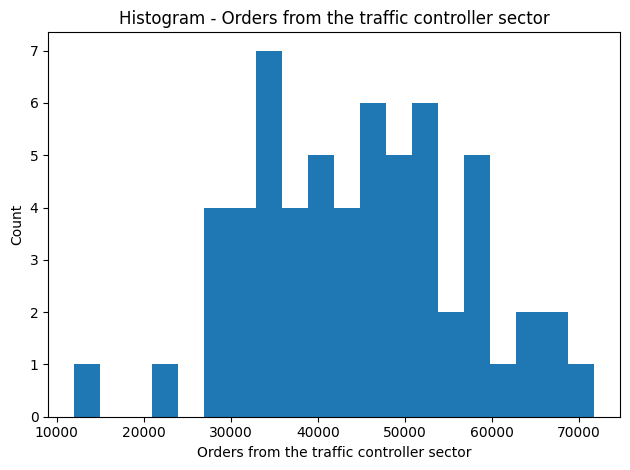

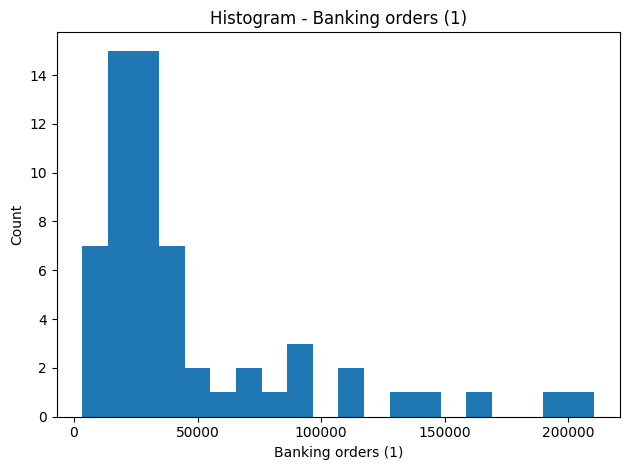

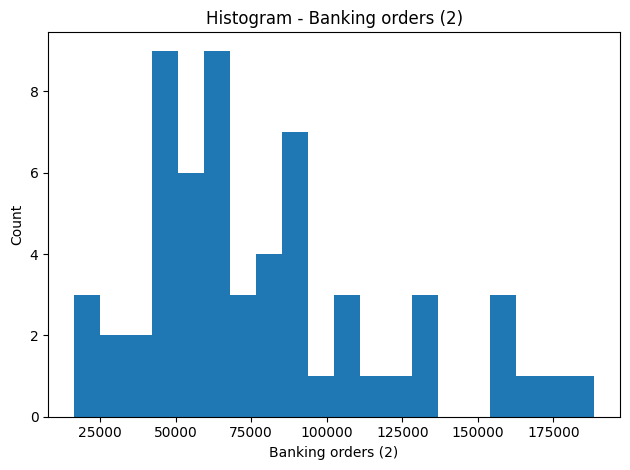

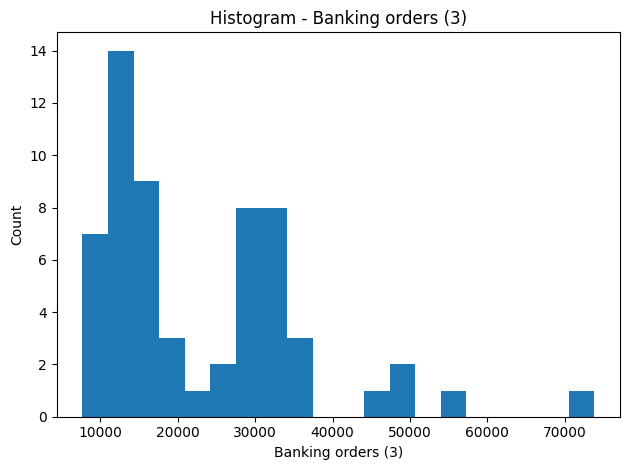

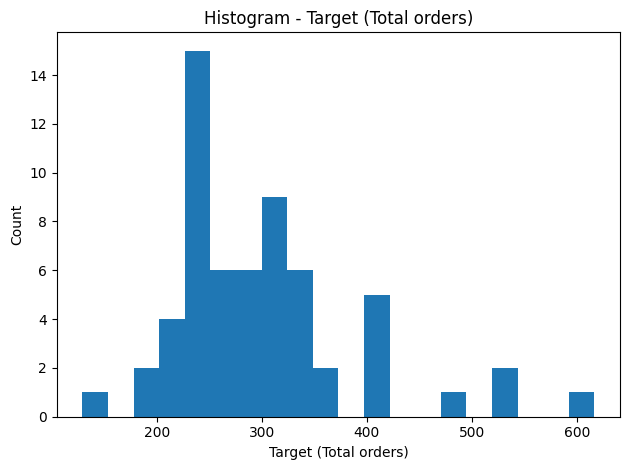

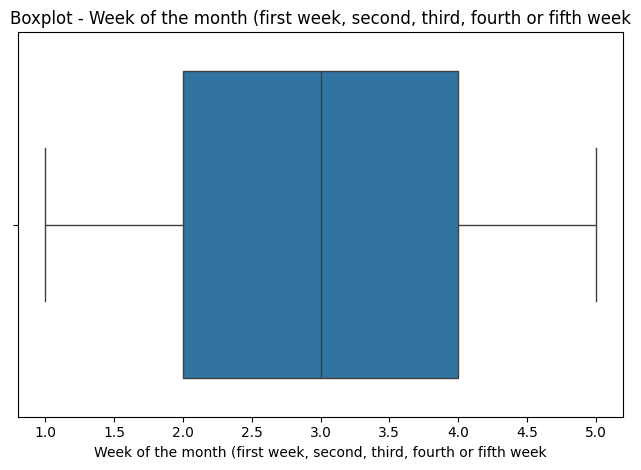

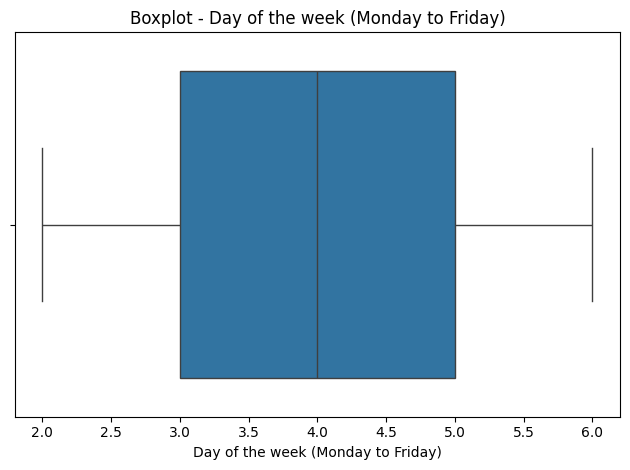

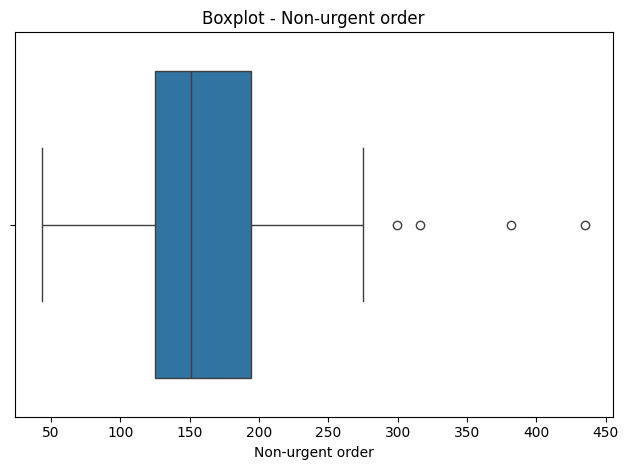

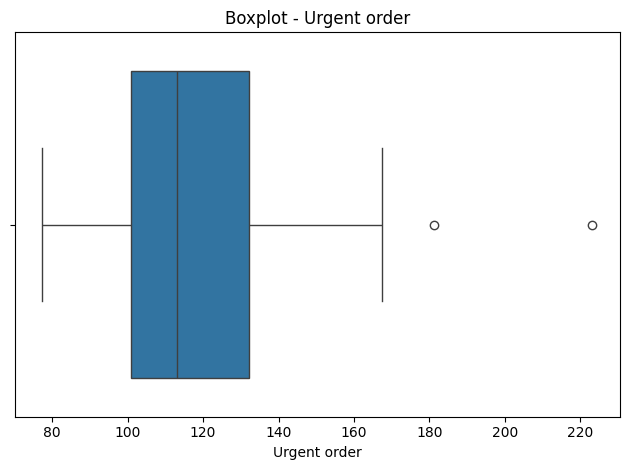

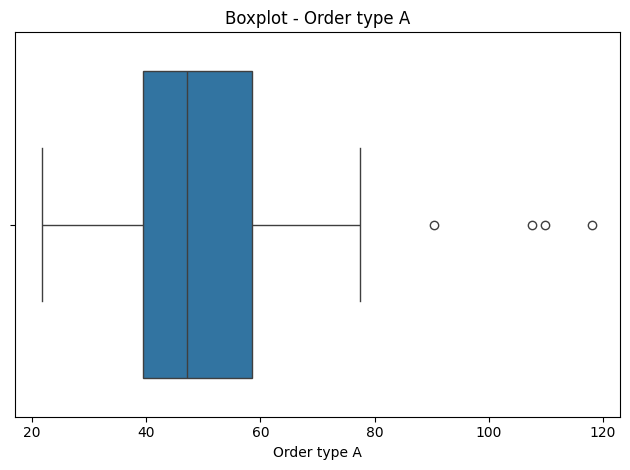

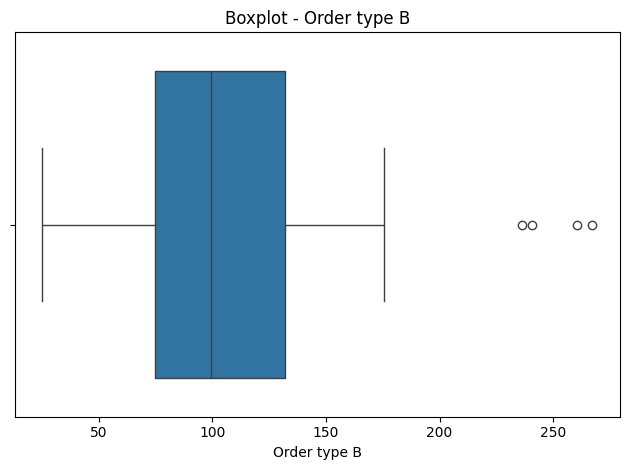

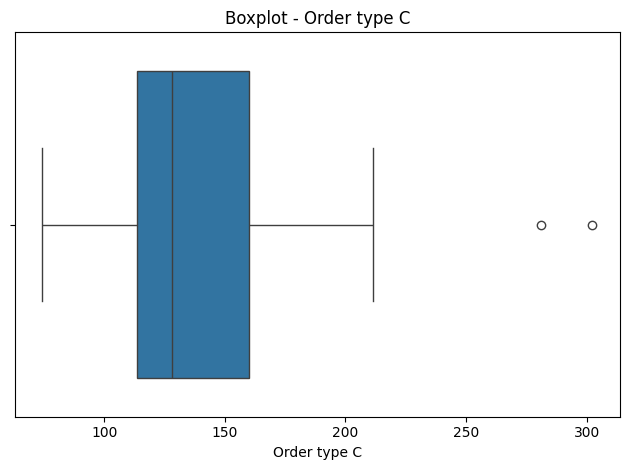

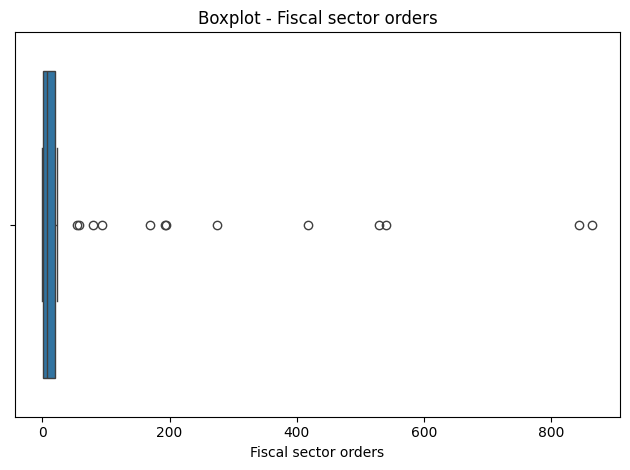

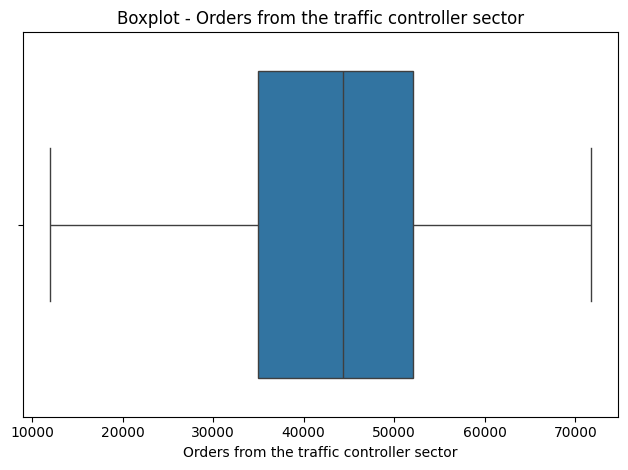

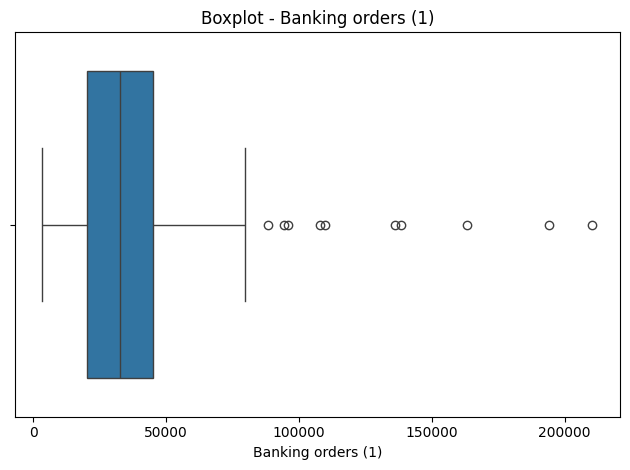

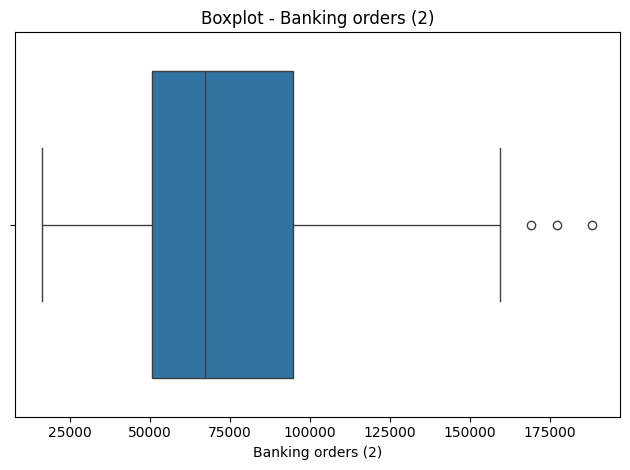

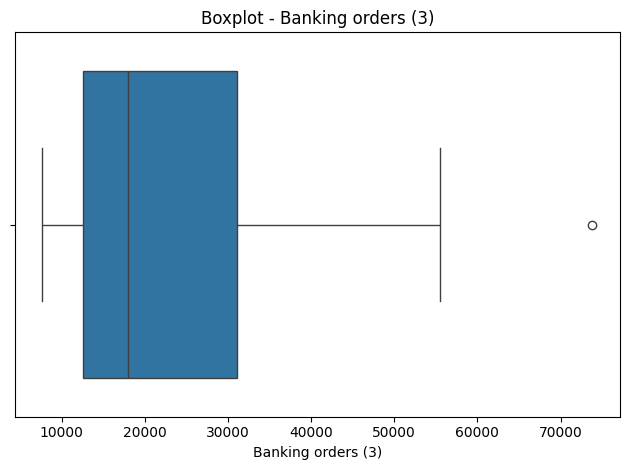

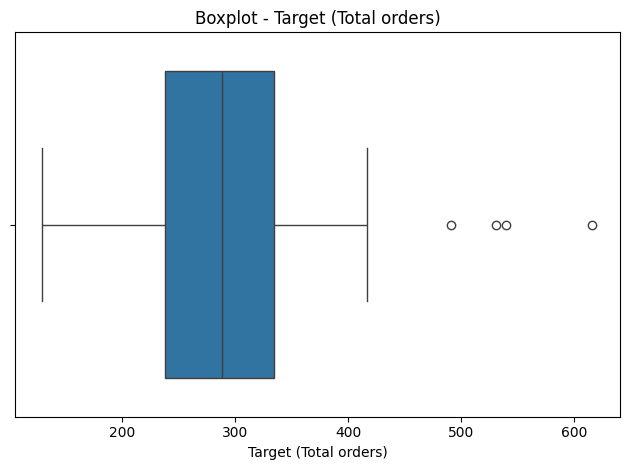

In [21]:
print("\nSkewness of all columns:")
print(df.skew())

for col in numerical_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Boxplots لكل عمود
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()


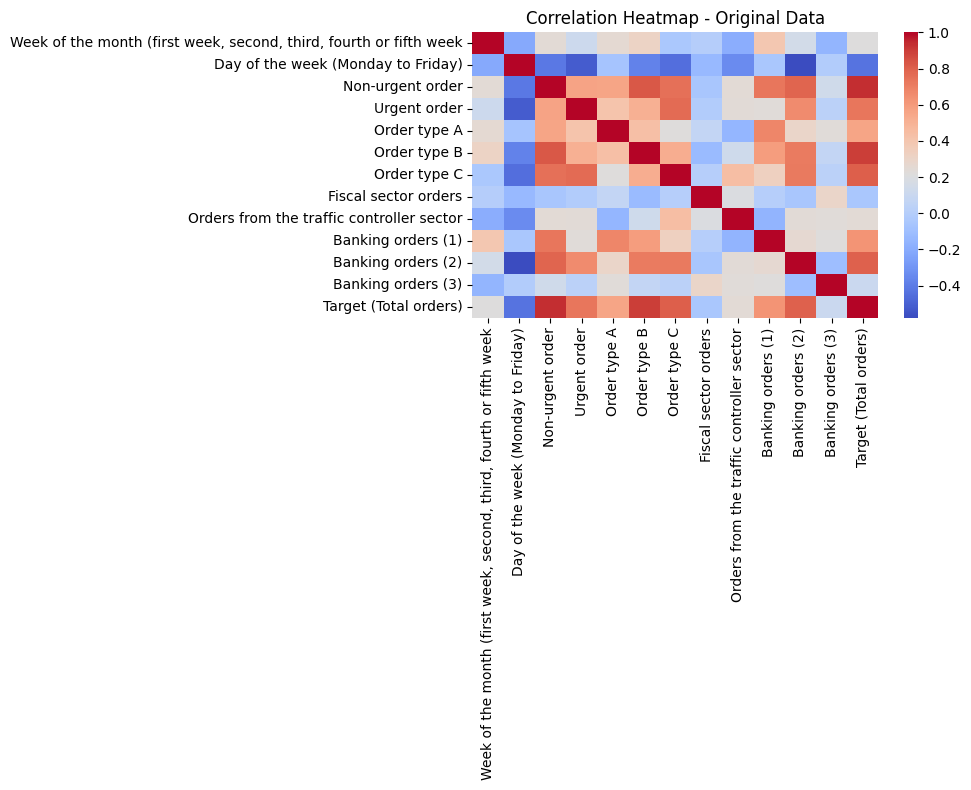

In [22]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Original Data")
plt.tight_layout()
plt.show()


Skewed columns (before log1p):
['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

Skewness after log1p on skewed columns:
Non-urgent order        -0.078369
Urgent order             0.574902
Order type A             0.612139
Order type B            -0.166162
Order type C             0.583133
Fiscal sector orders     0.633946
Banking orders (1)       0.098177
Banking orders (2)      -0.368330
Banking orders (3)       0.295486
Target (Total orders)    0.356457
dtype: float64


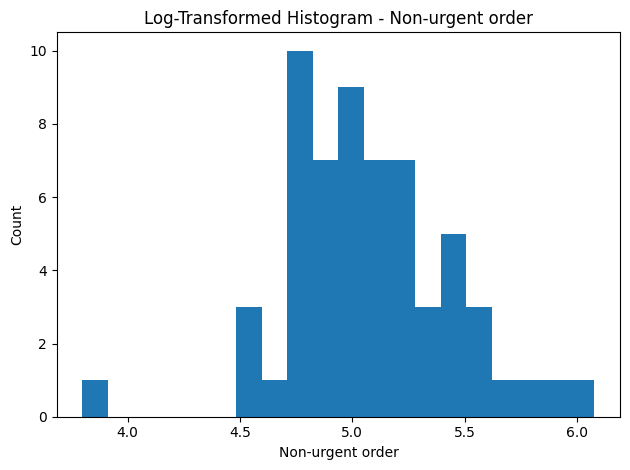

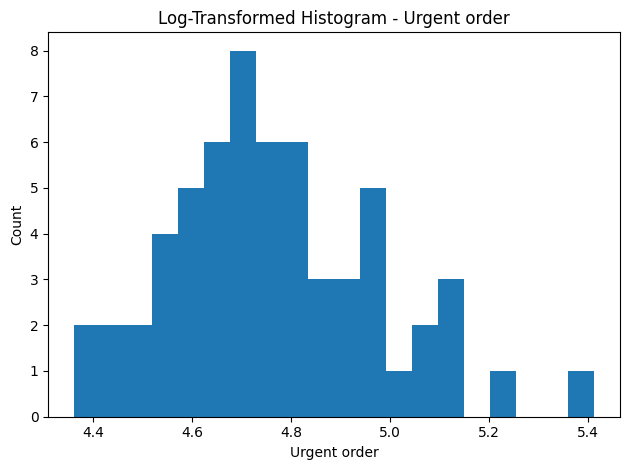

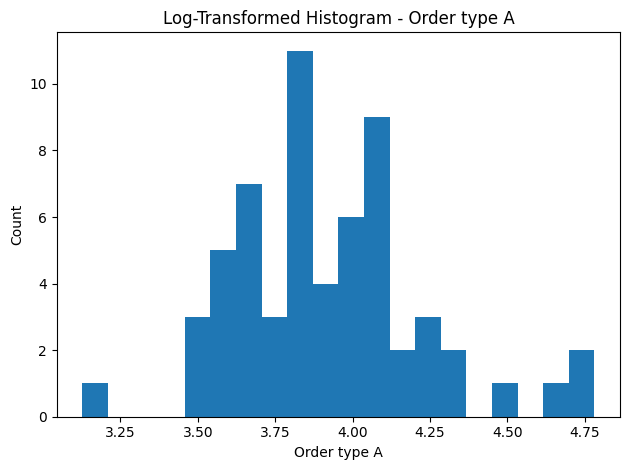

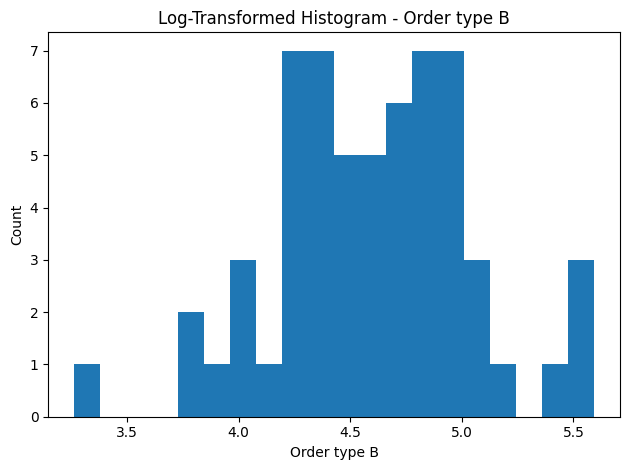

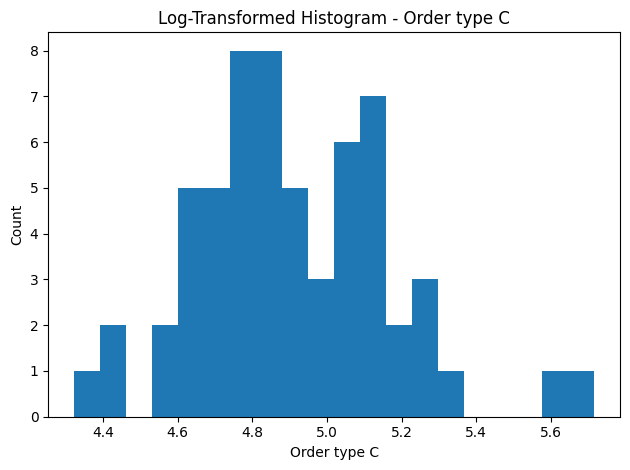

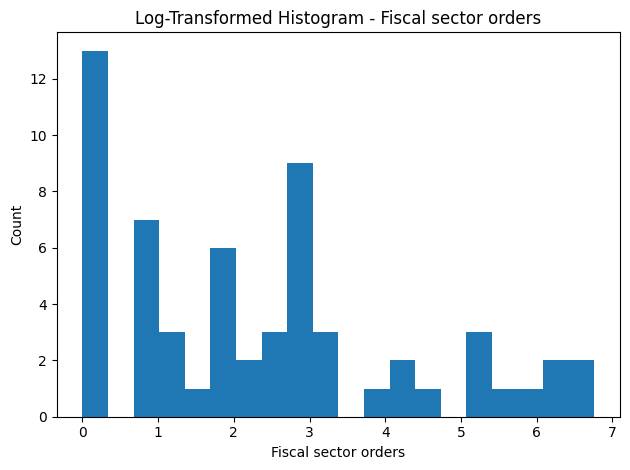

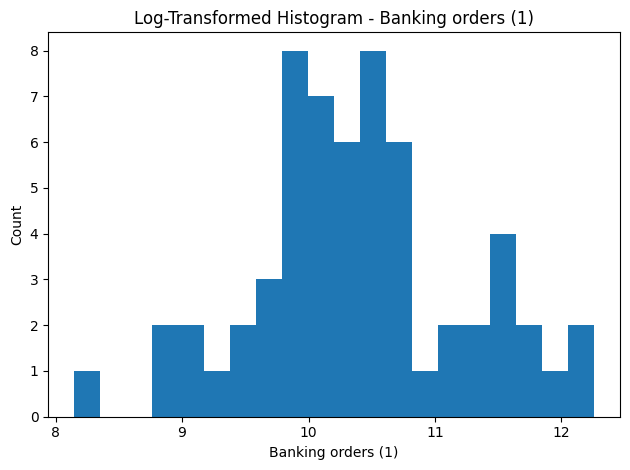

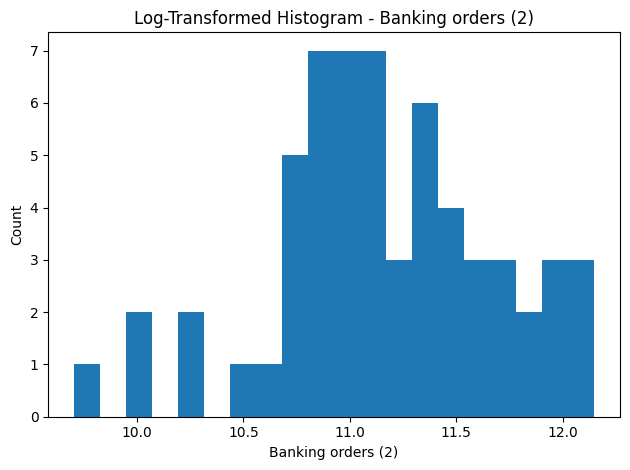

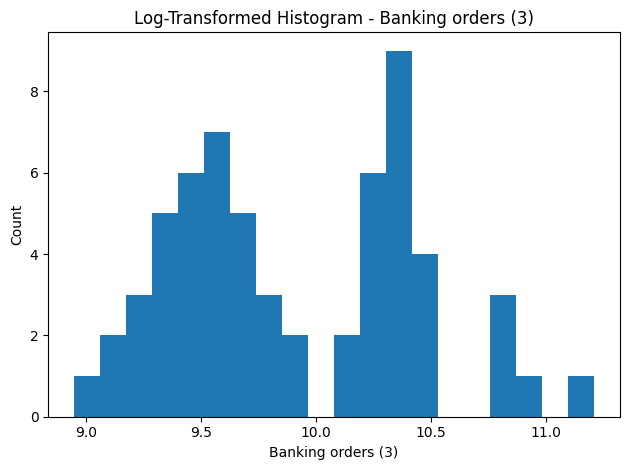

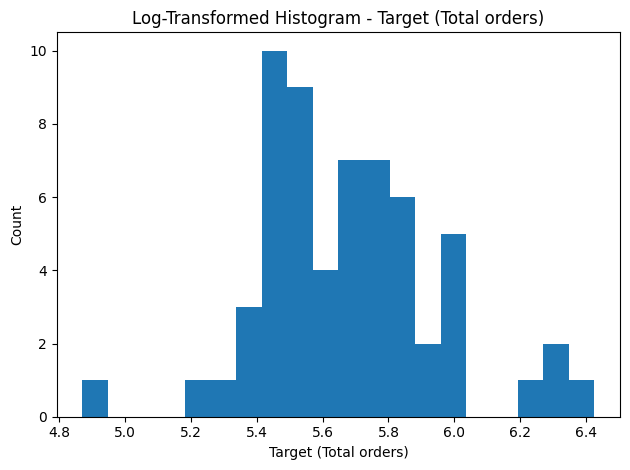

In [23]:
skew_vals = df.skew()
skewed_cols = skew_vals[skew_vals > 0.8].index.tolist()

print("\nSkewed columns (before log1p):")
print(skewed_cols)

df_log = df.copy()
for col in skewed_cols:
    df_log[col] = np.log1p(df_log[col])  # log(1 + x)

print("\nSkewness after log1p on skewed columns:")
print(df_log[skewed_cols].skew())

for col in skewed_cols:
    plt.figure()
    plt.hist(df_log[col], bins=20)
    plt.title(f"Log-Transformed Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

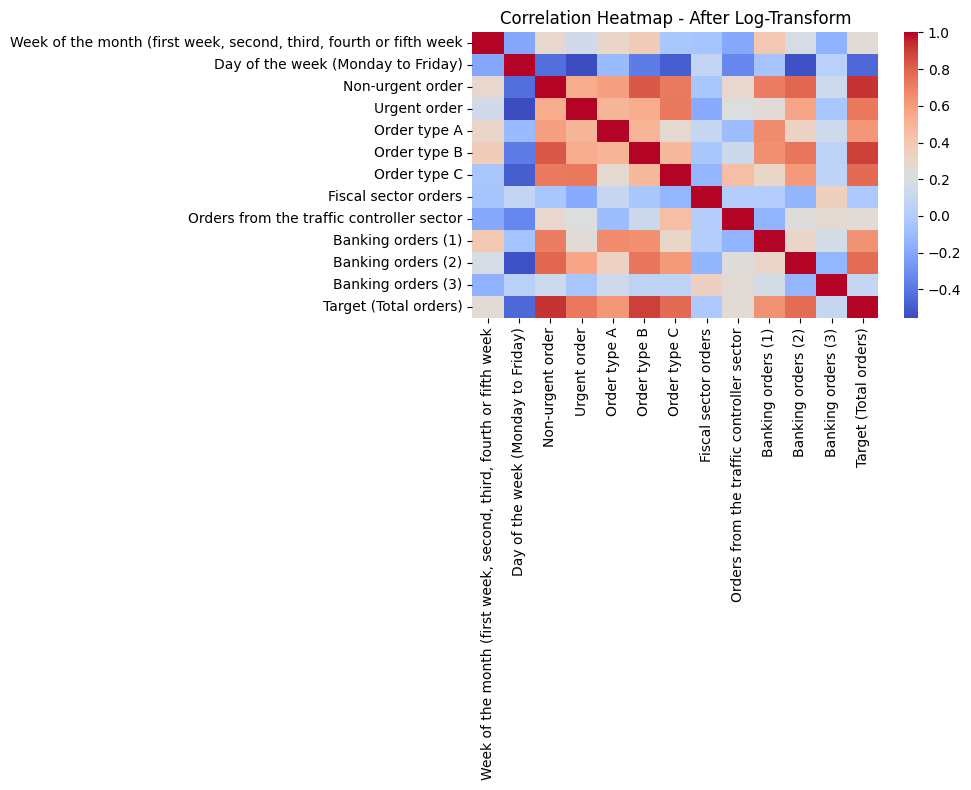

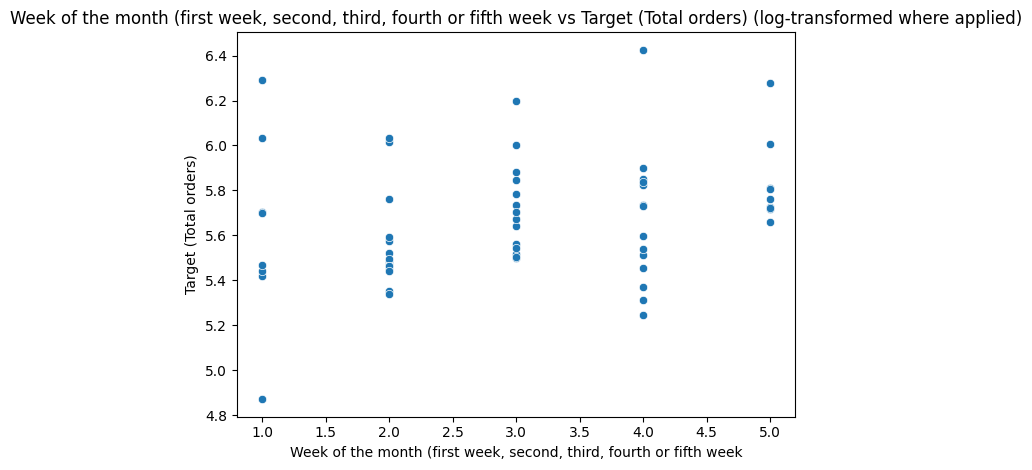

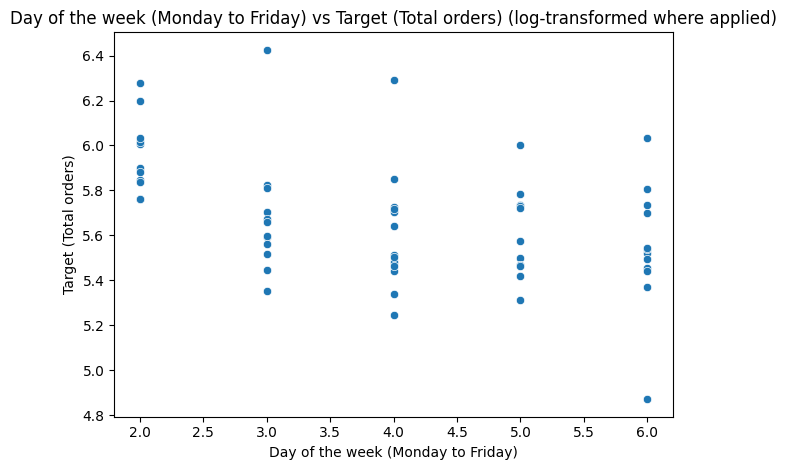

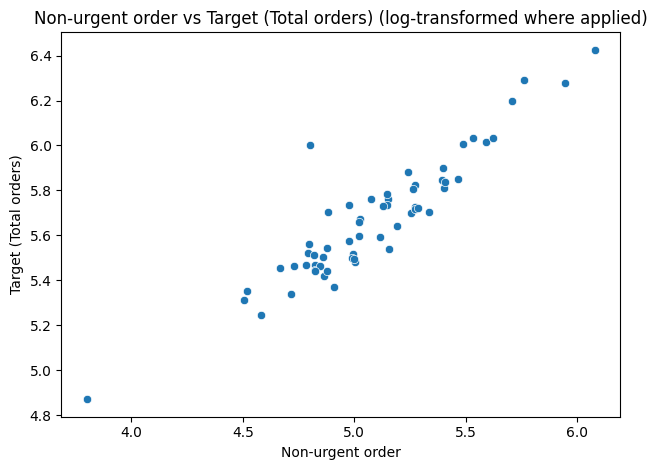

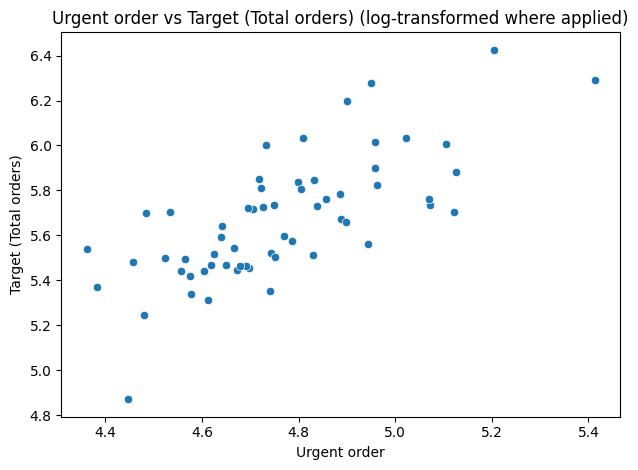

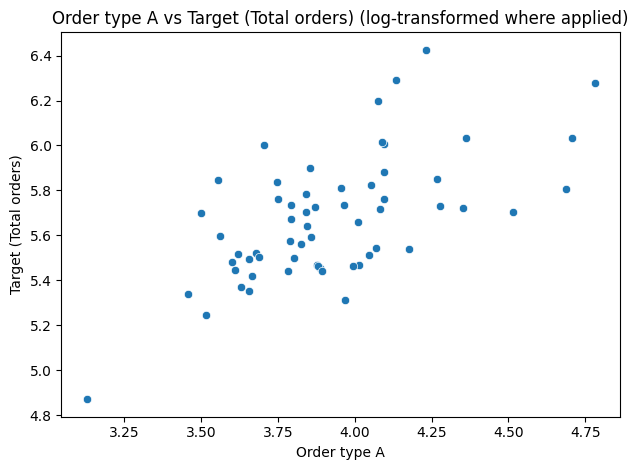

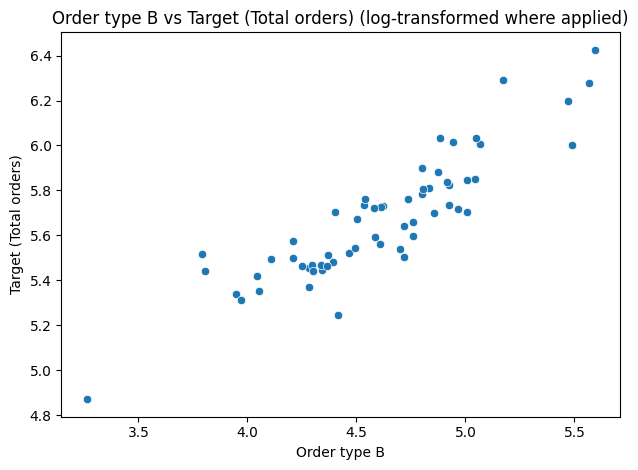

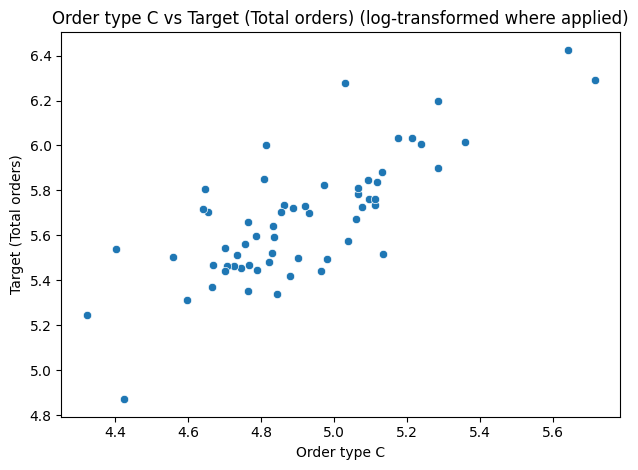

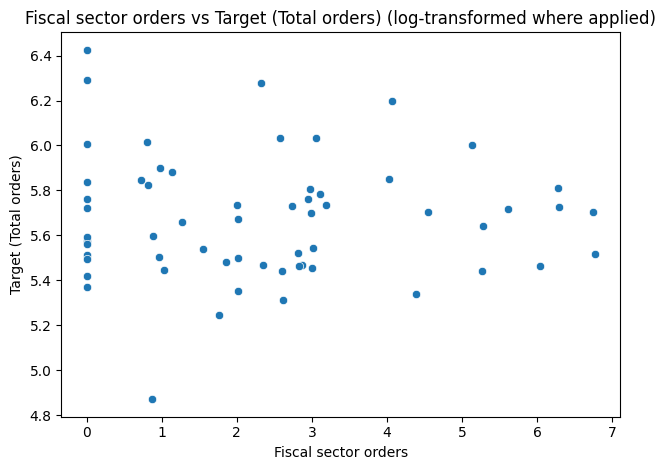

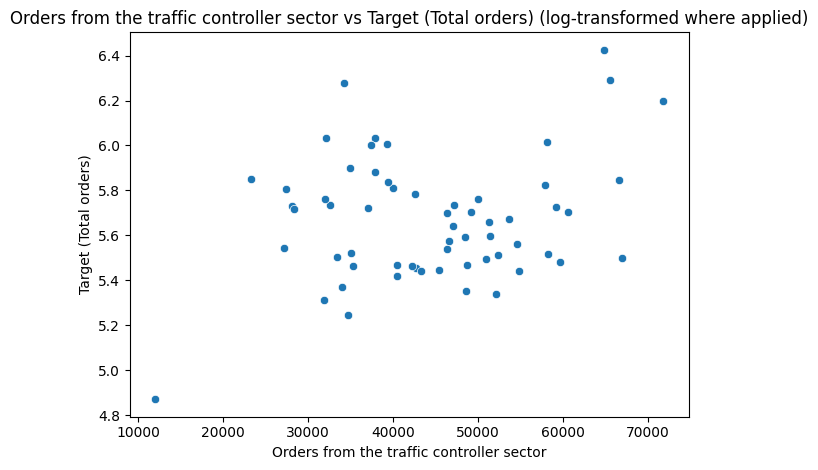

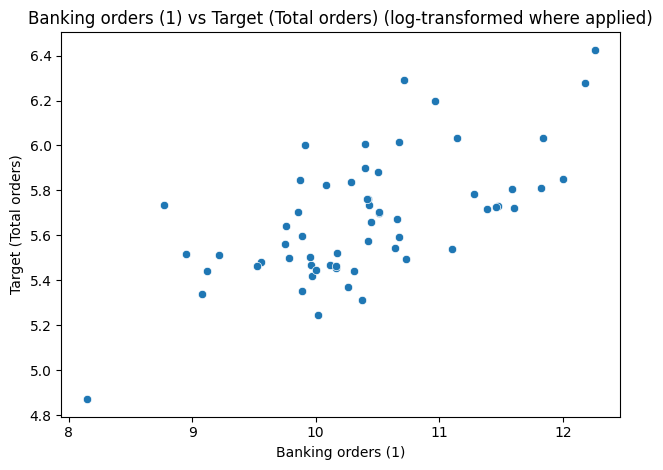

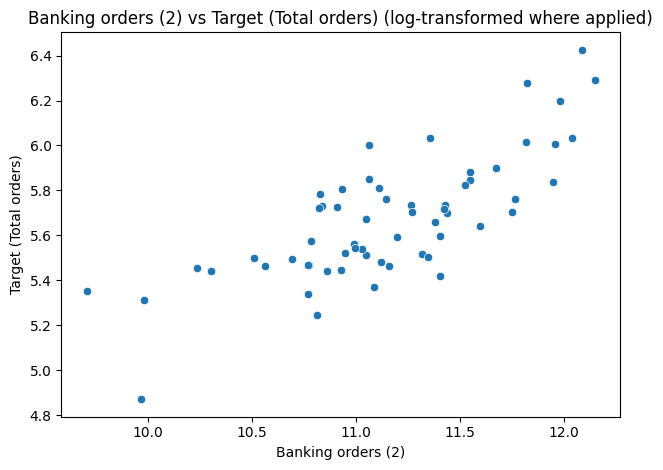

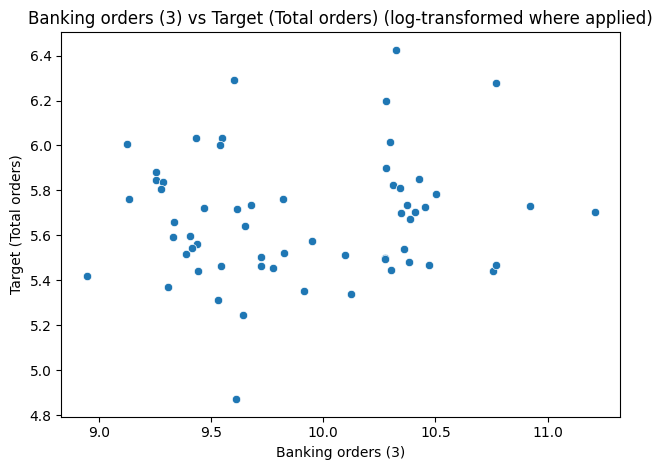

In [24]:
corr_log = df_log.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_log, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - After Log-Transform")
plt.tight_layout()
plt.show()

target_col = "Target (Total orders)"

for col in df_log.columns:
    if col == target_col:
        continue
    plt.figure()
    sns.scatterplot(x=df_log[col], y=df_log[target_col])
    plt.title(f"{col} vs {target_col} (log-transformed where applied)")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()


In [25]:
X_for_vif = df_log.drop(columns=[target_col])
vif_df = pd.DataFrame()
vif_df["feature"] = X_for_vif.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])
]

print("\nVIF on log-transformed data (all numeric features):")
print(vif_df)


VIF on log-transformed data (all numeric features):
                                              feature          VIF
0   Week of the month (first week, second, third, ...    10.378733
1                  Day of the week (Monday to Friday)    15.839224
2                                    Non-urgent order  5410.419935
3                                        Urgent order  4616.329382
4                                        Order type A   842.318761
5                                        Order type B   710.096924
6                                        Order type C  4116.823246
7                                Fiscal sector orders     3.178636
8           Orders from the traffic controller sector    28.880646
9                                  Banking orders (1)   732.611488
10                                 Banking orders (2)  1624.663442
11                                 Banking orders (3)   393.448304


In [26]:
df_fe = df.copy()

df_fe["Total_type_ABC"] = (
    df_fe["Order type A"] + df_fe["Order type B"] + df_fe["Order type C"]
)

df_fe["Total_urgent_nonurgent"] = (
    df_fe["Non-urgent order"] + df_fe["Urgent order"]
)

df_fe["Total_banking"] = (
    df_fe["Banking orders (1)"] +
    df_fe["Banking orders (2)"] +
    df_fe["Banking orders (3)"]
)

cols_to_keep = [
    "Week of the month (first week, second, third, fourth or fifth week",
    "Day of the week (Monday to Friday)",
    "Fiscal sector orders",
    "Orders from the traffic controller sector",
    "Total_type_ABC",
    "Total_urgent_nonurgent",
    "Total_banking",
    target_col,
]

df_model = df_fe[cols_to_keep].copy()

print("\nHead of df_model (with engineered features):")
print(df_model.head())


Head of df_model (with engineered features):
   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Fiscal sector orders  \
0                                   4                 0.000   
1                                   5                 0.000   
2                                   6                 1.386   
3                                   2                18.156   
4                                   3                 6.459   

   Orders from the traffic controller sector  Total_type_ABC  \
0                                      65556         539.577   
1       

In [ ]:
df_model_log = df_model.copy()

for col in df_model_log.columns:
    if (df_model_log[col] > 0).all():
        df_model_log[col] = np.log1p(df_model_log[col])

print("\nHead of df_model_log (final modeling dataframe):")
print(df_model_log.head())

corr_eng = df_model_log.corr()[target_col].sort_values(ascending=False)
print("\nCorrelation with target (engineered + log):")
print(corr_eng)

X_eng = df_model_log.drop(columns=[target_col])
vif_df_eng = pd.DataFrame()
vif_df_eng["feature"] = X_eng.columns
vif_df_eng["VIF"] = [
    variance_inflation_factor(X_eng.values, i) for i in range(X_eng.shape[1])
]

print("\nVIF on engineered + log-transformed features:")
print(vif_df_eng)